# <center><font style="color:rgb(100,109,254)">Advance Color Adjustment </font><center>

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

With `cv2.LUT()` you can do some advance color manipulation, you can really create some interesting filters with this, We can easily do this by stretching the R,G,B channels either above (towards the brighter end) or down (lower end). This will create cool filters. Lets see how we can do this

## <font style="color:rgb(134,19,348)"> Making A Cooling Filter </font>
We can make cooling like filter if we make the values of blue channel high and values of red channel low.

**Note:** These can easily be done without `LUT` but its more efficient with them as we have discussed in previous notebooks. 

In [2]:
# points we are going to drag (on the upper end in this case)
pixel_values = np.array([0, 50, 100, 150, 200, 255])

# map the pixel_values to a higher value for the blue channel
blue_Channel = np.array([0, 75, 140, 180, 220, 255])

# map the pixel_values to a higher value for the blue channel
red_Channel = np.array([0, 25,  55,  80, 160, 255])

Now we will create Create a LookUp Table for both red and blue channels, we have specified the pivot or dragging points, the points in between will be interpolated by the function `np.interp` this means we have set `0` to `0` and `50` to `25` for red but what about `10` , well `10` will be interpolated according to other values you have set.

In [3]:
pixel_range = np.arange(0,256)
red_channel_LUT = np.interp(pixel_range, pixel_values, red_Channel )
blue_channel_LUT = np.interp(pixel_range, pixel_values, blue_Channel )

**Now lets apply lets modify the channels with their respective look up tables.**

In [4]:
image = cv2.imread("media/M4/MsWatson.jpg",1)
original_image = image.copy()

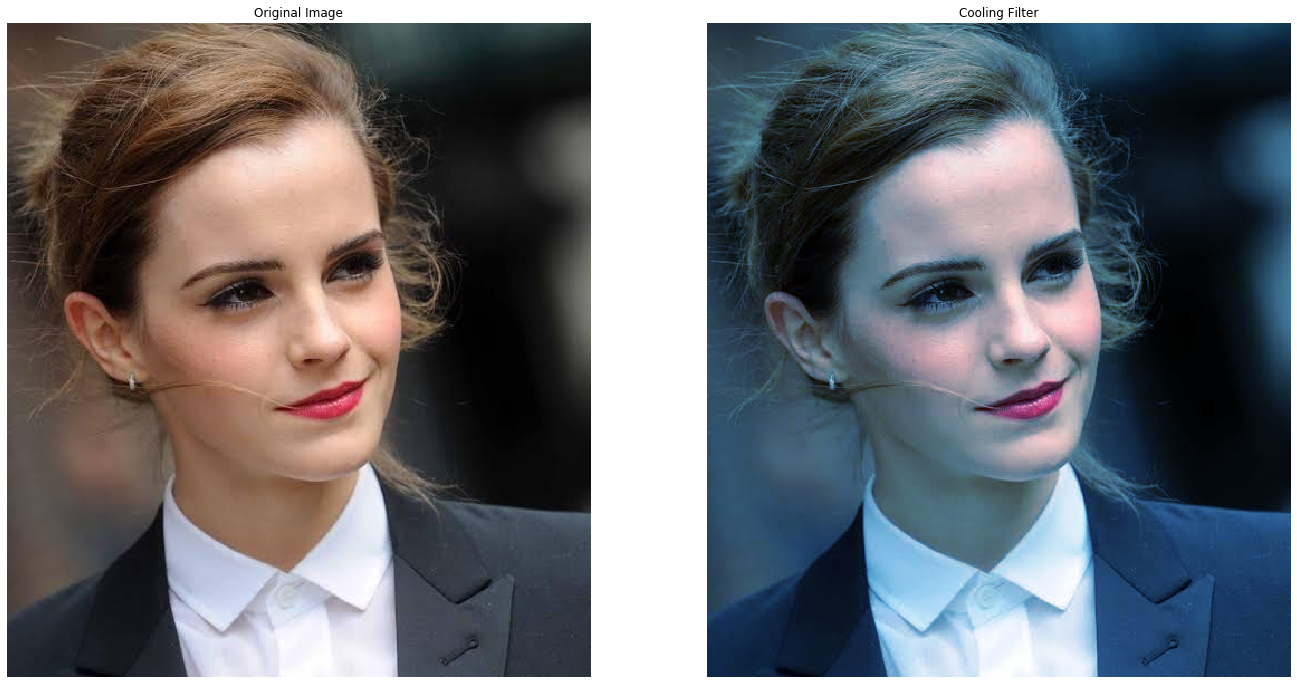

In [5]:
# mapping blue channel to new values
image[:,:,0] = cv2.LUT(image[:,:,0], blue_channel_LUT)

# mapping red channel to new values
image[:,:,2] = cv2.LUT(image[:,:,2], red_channel_LUT)


plt.figure(figsize=[23,23])
plt.subplot(121);plt.imshow(original_image[...,::-1]);plt.title("Original Image");plt.axis('off');
plt.subplot(122);plt.imshow(image[...,::-1]);plt.title("Cooling Filter");plt.axis('off');

## <font style="color:rgb(134,19,348)"> Bright & Dark Filter </font>
One more intresting filter you can create with this a bright and dark filter, in which you you can make bright pixels more bright and dark pixels more dark, now this means you would have to either modify all channels if you're dealing with BGR or just the brightness channel when dealing with HSV images. 

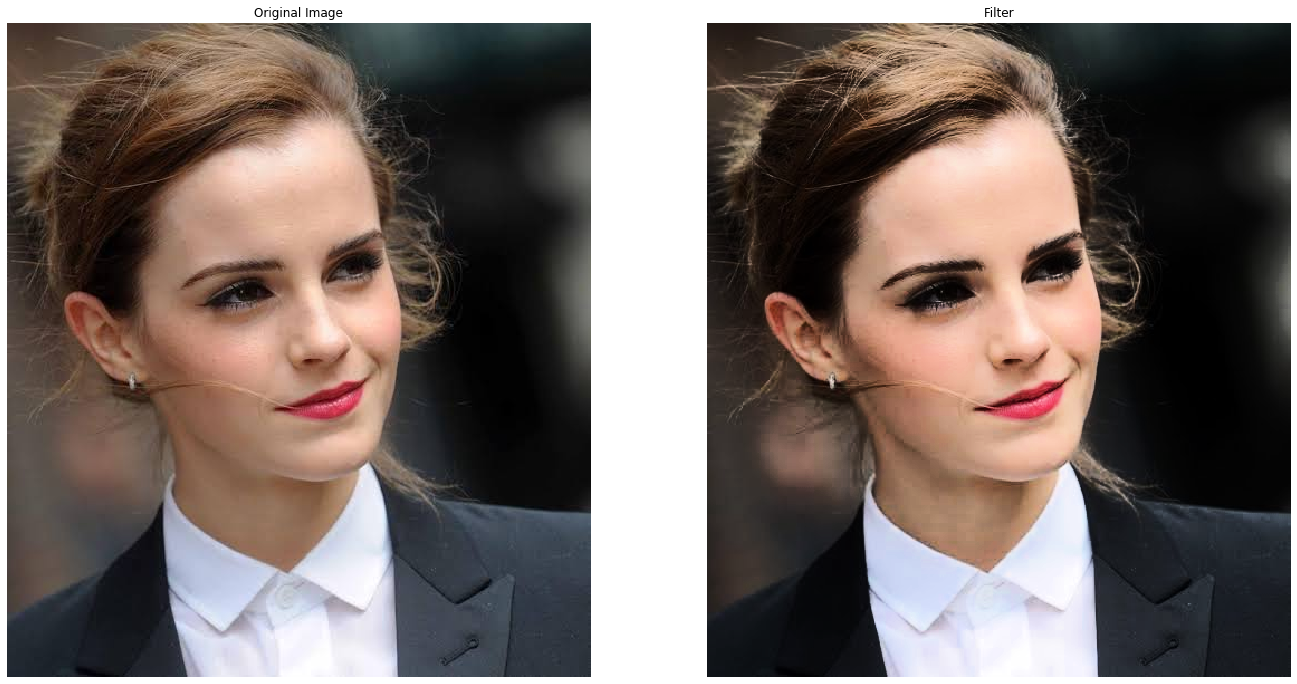

In [6]:
image = cv2.imread("media/M4/MsWatson.jpg",1)
original_image = image.copy()

#Creating the required pivot pixels
pixel_values = np.array([0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 255])

# make the dark pixels darker and bright pixels brighter
new_values   = np.array([0, 10, 25, 40,  65, 125, 180, 210, 235, 245, 255])

# create the lookUP Table
pixel_range = np.arange(0,256)
LUT = np.interp(pixel_range, pixel_values, new_values )

# converting to hsv
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# modify the value channel
hsv[:,:,2] = cv2.LUT(hsv[:,:,2], LUT)

# convert back to BGR
image = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

plt.figure(figsize=[23,23])
plt.subplot(121);plt.imshow(original_image[...,::-1]);plt.title("Original Image");plt.axis('off');
plt.subplot(122);plt.imshow(image[...,::-1]);plt.title("Filter");plt.axis('off');

**Similarly you can create other kinds interesting filters**

###  <font style="color:rgb(34,169,134)"> Assignment: Custom Filters </font>

**You have to create a filter in which you make the bright area brighter but the dark areas remain same, also make another filter in which you enhance the red channel and lessen the blue channel (this is called a warming filter).**

In [ ]:
### ADD CODE HERE FOR FILTER 1



In [ ]:
### ADD CODE HERE FOR FILTER 2

